# **Importing datasets**

In [ ]:
# Need to use API key which you can add to your collab secrets.
from google.colab import userdata
import json
import os

kaggle_key = userdata.get('kaggle_key')

os.makedirs('/root/.kaggle', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write(kaggle_key)

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
print("mental-szegeelim/mental-health")
!kaggle datasets download szegeelim/mental-health
print("\n")

print("aunanya875/suicidal-tweet-detection-dataset")
!kaggle datasets download aunanya875/suicidal-tweet-detection-dataset
print("\n")

print("neelghoshal/reddit-mental-health-data")
!kaggle datasets download neelghoshal/reddit-mental-health-data
print("\n")

print("Dreaddit: A Reddit Dataset for Stress Analysis in Social Media")
!curl -o ./dreaddit.zip "http://www.cs.columbia.edu/~eturcan/data/dreaddit.zip"

mental-szegeelim/mental-health
Dataset URL: https://www.kaggle.com/datasets/szegeelim/mental-health
License(s): DbCL-1.0


aunanya875/suicidal-tweet-detection-dataset
Dataset URL: https://www.kaggle.com/datasets/aunanya875/suicidal-tweet-detection-dataset
License(s): CC-BY-NC-SA-4.0


neelghoshal/reddit-mental-health-data
Dataset URL: https://www.kaggle.com/datasets/neelghoshal/reddit-mental-health-data
License(s): unknown


Dreaddit: A Reddit Dataset for Stress Analysis in Social Media
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1317k  100 1317k    0     0  1755k      0 --:--:-- --:--:-- --:--:-- 1753k


# **Import libraries**

In [ ]:
!pip install zipfile36

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import re
from collections import Counter
import nltk
import spacy

# Importing pd.DataFrame

## mental_health

In [ ]:
mental_health = pd.read_csv('/content/mental-health.zip', compression='zip', index_col=0)

## suicidal_tweet_detection_dataset

In [ ]:
suicidal_tweet_detection_dataset = pd.read_csv('/content/suicidal-tweet-detection-dataset.zip', compression='zip')

## reddit_mental_health_data

In [ ]:
reddit_mental_health_data = pd.read_csv('/content/reddit-mental-health-data.zip', compression='zip', index_col=0)

# In the target column, map numering values to the corresponding mental health disorder
reddit_mental_health_data['target'] = reddit_mental_health_data['target'].map({0: 'Stress', 1:'Depression', 2: 'Bipolar disorder', 3: 'Personality disorder', 4: 'Anxiety'})

## dreaddit

In [ ]:
# open zipped dataset
with zipfile.ZipFile("dreaddit.zip") as z:
   # open the csv file in the dataset
   with z.open("dreaddit-train.csv") as f:

      # read the dataset
      dreaddit_train = pd.read_csv(f)

   with z.open("dreaddit-test.csv") as f:

      # read the dataset
      dreaddit_test = pd.read_csv(f)

# Choose one of this two lines, based on if you want only training data or also test data
dreaddit = dreaddit_train
# dreaddit = pd.concat([dreaddit_train, dreaddit_test])

# Mapping label encoding to the corresponding values;
dreaddit['label'] = dreaddit['label'].map({0: 'Not stressful', 1: 'Stressful'})

# **Descriptive analysis - Raw**

## mental_health

In [ ]:
# List columns and thier dtypes
mental_health.dtypes

,0
statement,object
status,object


In [ ]:
# Summary information about the DataFrame
mental_health.describe()

,statement,status
count,52681,53043
unique,51073,7
top,what do you mean?,Normal
freq,22,16351


## suicidal_tweet_detection_dataset

In [ ]:
# List columns and thier dtypes
suicidal_tweet_detection_dataset.dtypes

,0
Tweet,object
Suicide,object


In [ ]:
# Summary information about the DataFrame
suicidal_tweet_detection_dataset.describe()

,Tweet,Suicide
count,1785,1787
unique,1777,2
top,RT @palestinianho: patient: i hate myself and ...,Not Suicide post
freq,2,1127


## reddit_mental_health_data

In [ ]:
# List columns and thier dtypes
reddit_mental_health_data.dtypes

,0
text,object
title,object
target,object


In [ ]:
# Summary information about the DataFrame
reddit_mental_health_data.describe()

,text,title,target
count,5607,5957,5957
unique,4420,4651,5
top,I am a research student doing research on Situ...,Survey on Situational Stress and Music (18 and...,Depression
freq,10,10,1202


## Dreaddit

In [ ]:
# List columns and thier dtypes
dreaddit.dtypes

,0
subreddit,object
post_id,object
sentence_range,object
text,object
id,int64
...,...
lex_dal_avg_pleasantness,float64
social_upvote_ratio,float64
social_num_comments,int64
syntax_fk_grade,float64


In [ ]:
# Summary information about the DataFrame
dreaddit.describe()

,id,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,33.428157,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,35.334770,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,1.420000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,25.770000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,61.550000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
# Summary information about the DataFrame
dreaddit.describe(include='object')

,subreddit,post_id,sentence_range,text,label
count,2838,2838,2838,2838,2838
unique,10,2343,173,2820,2
top,ptsd,7o5n2d,"(0, 5)",#NAME?,Stressful
freq,584,6,337,4,1488


# **Data quality - Raw**

## mental_health

In [ ]:
# Check the presence of null values
mental_health.isna().sum()

,0
statement,362
status,0


In [ ]:
# Check the status associted to observation with missing statements
mental_health[mental_health['statement'].isna()]['status'].value_counts()

,count
status,
Personality disorder,124
Bipolar,100
Stress,82
Anxiety,47
Normal,8
Suicidal,1


## suicidal_tweet_detection_dataset

In [ ]:
# Check the presence of null values
suicidal_tweet_detection_dataset.isna().sum()

,0
Tweet,2
Suicide,0


In [ ]:
# Check the status associted to observation with missing statements
suicidal_tweet_detection_dataset[suicidal_tweet_detection_dataset['Tweet'].isna()]['Suicide'].value_counts()

,count
Suicide,
Potential Suicide post,1
Not Suicide post,1


## reddit_mental_health_data

In [ ]:
# Check the presence of null values
mental_health.isna().sum()

,0
statement,362
status,0


 ## Dreaddit

In [ ]:
# Check the presence of null values
dreaddit_na = dreaddit.isna().sum()

dreaddit_na.loc[dreaddit_na > 0]

,0


# **Preprocessing**

## mental_health

In [ ]:
# Delete rows with missing statement
mental_health = mental_health.dropna()

# Drop statement's dupicates
mental_health = mental_health.drop_duplicates(subset='statement')


## suicidal_tweet_detection_dataset

In [ ]:
# Delete rows with missing Tweet
suicidal_tweet_detection_dataset = suicidal_tweet_detection_dataset.dropna()

# Drop tweet's dupicates
suicidal_tweet_detection_dataset = suicidal_tweet_detection_dataset.drop_duplicates(subset='Tweet')

# Add column with name of the social where the text was posted
suicidal_tweet_detection_dataset['social'] = 'Twitter'

## reddit_mental_health_data

In [ ]:
# Delete rows with missing Tweet
reddit_mental_health_data = reddit_mental_health_data.dropna()

# Drop tweet's dupicates
reddit_mental_health_data = reddit_mental_health_data.drop_duplicates(subset='text')

# Add column with name of the social where the text was posted
reddit_mental_health_data['social'] = 'Reddit'

## dreaddit

In [ ]:
# Drop rows where text in missing
dreaddit = dreaddit.loc[dreaddit['text'] != '#NAME?']

# Drop dupicates
dreaddit = dreaddit.drop_duplicates(subset=['subreddit', 'text'])

# Add column with name of the social where the text was posted
dreaddit['social'] = 'Reddit'

# **Descriptive analysis - Preprocessed**

## mental_health

In [ ]:
# Summary information about the DataFrame
mental_health.describe()

,statement,status
count,51073,51073
unique,51073,7
top,Getting through the day How do you get anythi...,Normal
freq,1,16039


## suicidal_tweet_deterction_dataset

In [ ]:
# Summary information about the DataFrame
mental_health.describe()

,statement,status
count,51073,51073
unique,51073,7
top,Getting through the day How do you get anythi...,Normal
freq,1,16039


## reddit_mental_health_data

In [ ]:
# Summary information about the DataFrame
reddit_mental_health_data.describe()

,text,title,target,social
count,4420,4420,4420,4420
unique,4420,4366,5,1
top,How do you get anything done with anxiety. I ...,Help,Depression,Reddit
freq,1,5,974,4420


## Dreaddit

In [ ]:
dreaddit.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_activation', 'lex_dal_min_imagery',
       'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment', 'social'],
      dtype='object', length=117)

In [ ]:
# Summary information about the DataFrame
dreaddit.describe()

,id,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2828.000000,2828.000000,2.828000e+03,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,...,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000
mean,13702.026521,0.808648,1.518095e+09,18.296322,4.667403,86.004243,35.156400,40.804353,67.177995,33.305435,...,1.087822,1.119974,1.000212,1.722774,1.536308,1.879357,0.843200,9.966761,5.439535,0.040788
std,17325.086350,0.177075,1.552928e+07,79.555899,3.296242,32.304989,26.428581,31.504195,32.821996,35.272416,...,0.117131,0.084885,0.006512,0.047809,0.102863,0.058937,0.174916,21.832764,2.524228,0.195478
min,4.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,925.750000,0.600000,1.509673e+09,2.000000,2.459959,65.000000,12.410000,12.100000,41.670000,1.420000,...,1.000000,1.000000,1.000000,1.691450,1.469700,1.841778,0.750000,2.000000,3.727817,-0.072309
50%,1884.500000,0.800000,1.517055e+09,5.000000,4.301723,81.000000,29.330000,33.430000,80.870000,25.770000,...,1.000000,1.142900,1.000000,1.721525,1.530430,1.878250,0.890000,5.000000,5.209918,0.044821
75%,25406.500000,1.000000,1.530900e+09,10.000000,6.483585,101.000000,54.960000,69.140000,96.210000,60.962500,...,1.142900,1.142900,1.000000,1.751720,1.596067,1.916220,1.000000,10.000000,6.837835,0.166667
max,55757.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
dreaddit.describe(include='object')

,subreddit,post_id,sentence_range,text,label,social
count,2828,2828,2828,2828,2828,2828
unique,10,2336,173,2819,2,1
top,ptsd,7o5n2d,"(0, 5)",If you were raped on a daily basis from infanc...,Stressful,Reddit
freq,582,6,334,2,1486,2828


# **Data quality - Preprocessed**

## mental_health

In [ ]:
# Check the presence of null values
mental_health.isna().sum()

,0
statement,0
status,0


In [ ]:
# Frequency of the values in the target column
mental_health['status'].value_counts()

,count
status,
Normal,16039
Depression,15087
Suicidal,10641
Anxiety,3617
Bipolar,2501
Stress,2293
Personality disorder,895


## suicidal_tweet_detection_dataset

In [ ]:
# Check the presence of null values
suicidal_tweet_detection_dataset.isna().sum()

,0
Tweet,0
Suicide,0
social,0


In [ ]:
# Frequency of the values in the target column
suicidal_tweet_detection_dataset['Suicide'].value_counts()

,count
Suicide,
Not Suicide post,1124
Potential Suicide post,653


## reddit_mental_health_data

In [ ]:
# Check the presence of null values
reddit_mental_health_data.isna().sum()

,0
text,0
title,0
target,0
social,0


In [ ]:
# Frequency of the values in the target column
reddit_mental_health_data['target'].value_counts()

,count
target,
Depression,974
Anxiety,933
Personality disorder,895
Bipolar disorder,809
Stress,809


# **Data visualization**

## mental-health

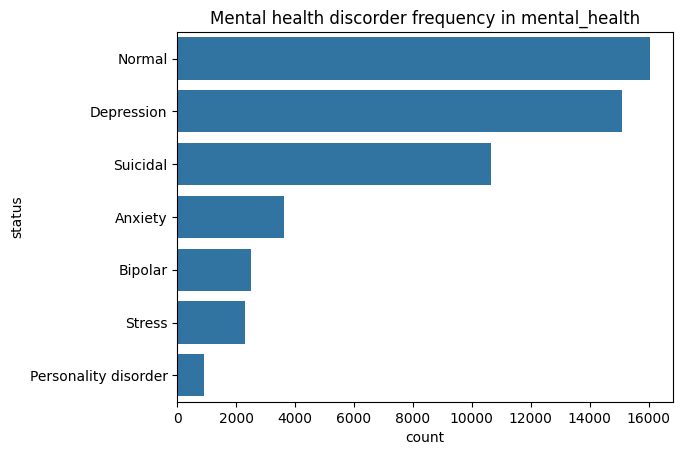

In [ ]:
# Set title
plt.title("Mental health discorder frequency in mental_health")

# Plot a frequency plot of the status associated to the tweet
sns.countplot(data=mental_health,
              y='status',
              order=mental_health['status'].value_counts().index)

plt.show()

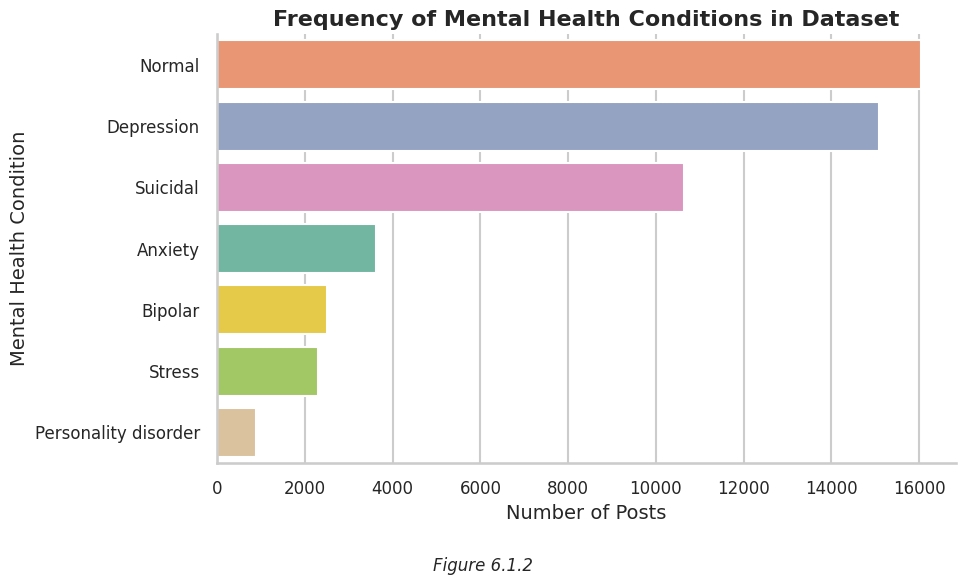

In [ ]:
# Bhavesh

sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(10, 6))

# Define the unique number of statuses
unique_statuses = mental_health['status'].nunique()

# Use a consistent, colorblind-friendly palette for better accessibility
palette = sns.color_palette("Set2", n_colors=unique_statuses)

# Plot the distribution of mental health conditions by post count
sns.countplot(
    data=mental_health,
    y='status',
    hue='status',
    order=mental_health['status'].value_counts().index,
    palette=palette,
    legend=False,
    ax=ax  # Pass the axis to sns.countplot
)

# Add a descriptive title and axis labels for clarity
ax.set_title("Frequency of Mental Health Conditions in Dataset", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Posts", fontsize=14)
ax.set_ylabel("Mental Health Condition", fontsize=14)

# Adjust tick label sizes to improve readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines for a cleaner look
sns.despine(ax=ax)

# Adjust layout and make space at the bottom for the caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure number and caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.1.2',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()


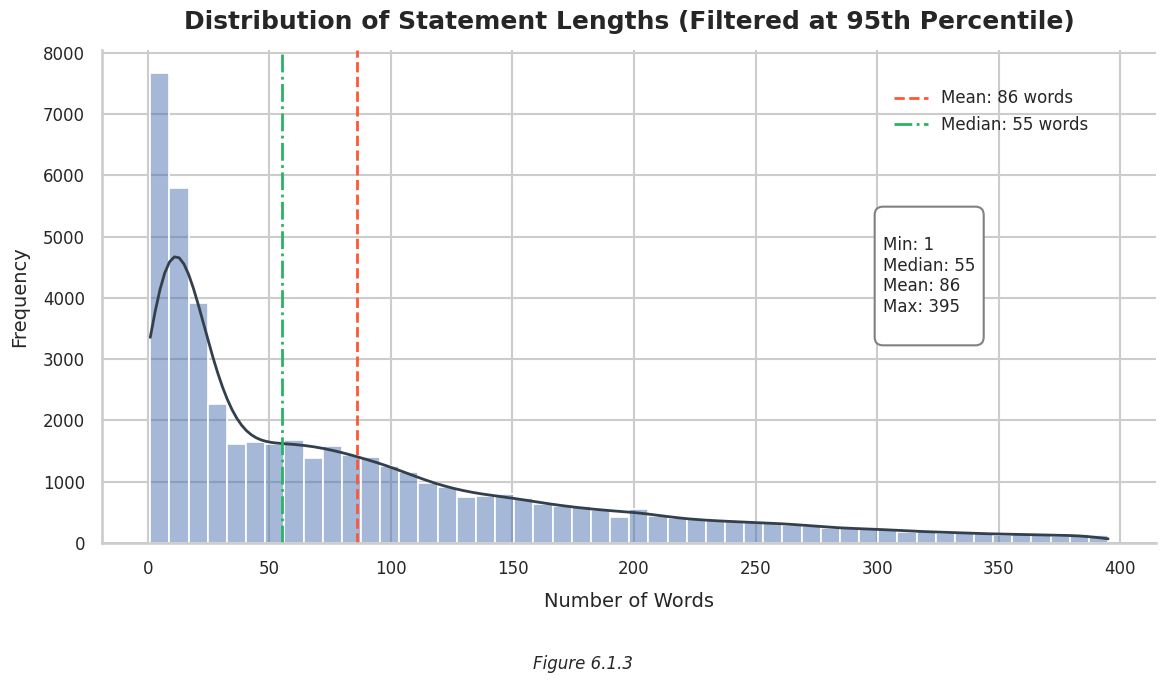

In [ ]:
# Bhavesh

# Calculate 95th percentile threshold
percentile_95 = mental_health['text_length'].quantile(0.95)

# Filter data below the 95th percentile
filtered_data = mental_health[mental_health['text_length'] <= percentile_95]

# Calculate summary stats on filtered data
mean_length = filtered_data['text_length'].mean()
median_length = filtered_data['text_length'].median()
max_length = filtered_data['text_length'].max()
min_length = filtered_data['text_length'].min()

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(12, 7))

# Plot histogram on filtered data
sns.histplot(
    data=filtered_data,
    x='text_length',
    bins=50,
    kde=True,
    color='#4C72B0',
    edgecolor='white',
    ax=ax
)

# Style the KDE line
plt.setp(ax.lines, linewidth=2, color='#333F4B')

# Add mean and median vertical lines
ax.axvline(mean_length, color='#FF5733', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.0f} words')
ax.axvline(median_length, color='#28B463', linestyle='-.', linewidth=2, label=f'Median: {median_length:.0f} words')

# Add title and labels
ax.set_title('Distribution of Statement Lengths (Filtered at 95th Percentile)', fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel('Number of Words', fontsize=14, labelpad=10)
ax.set_ylabel('Frequency', fontsize=14, labelpad=10)

# Legend configuration
ax.legend(frameon=False, fontsize=12, loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Tick label size adjustments
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines for a cleaner look
sns.despine(ax=ax)

# Add summary stats box inside the figure
fig.text(
    0.75, 0.5,
    f'''
Min: {min_length:.0f}
Median: {median_length:.0f}
Mean: {mean_length:.0f}
Max: {max_length:.0f}
''',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Adjust layout to leave space for the figure caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.1.3',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Show the plot
plt.show()


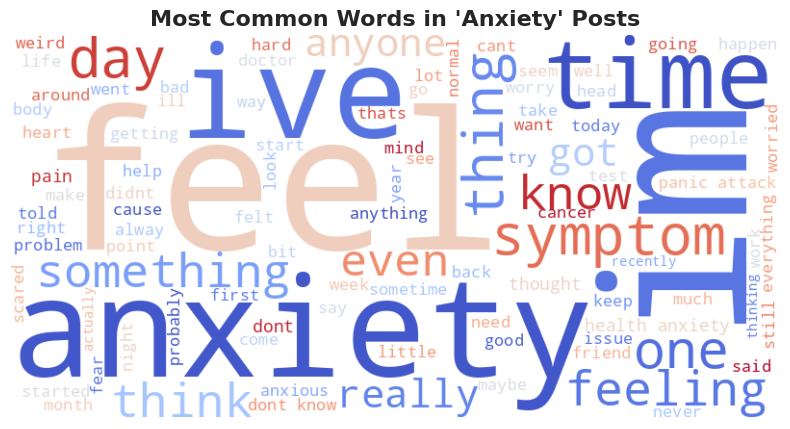

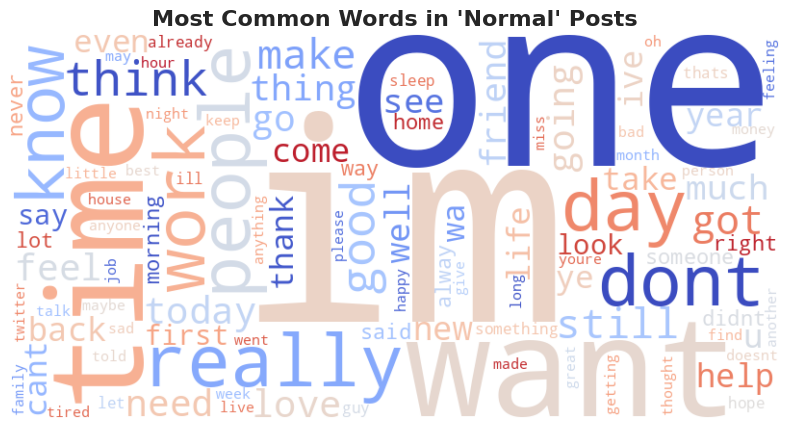

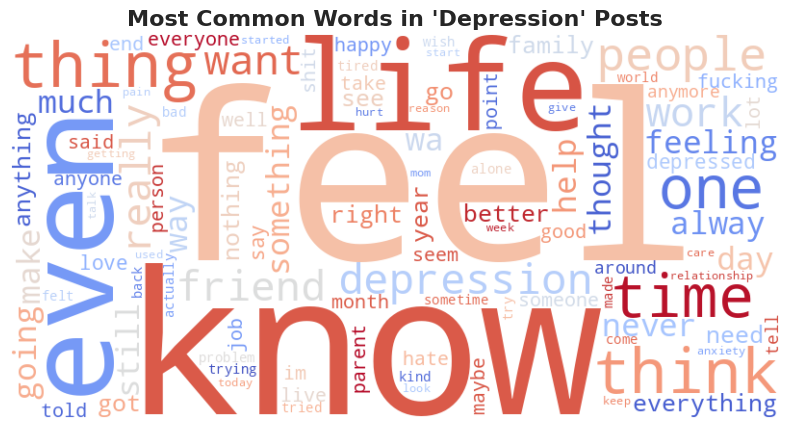

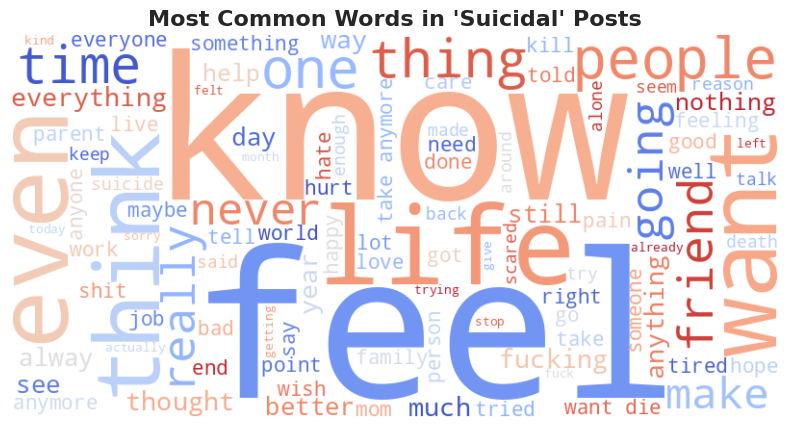

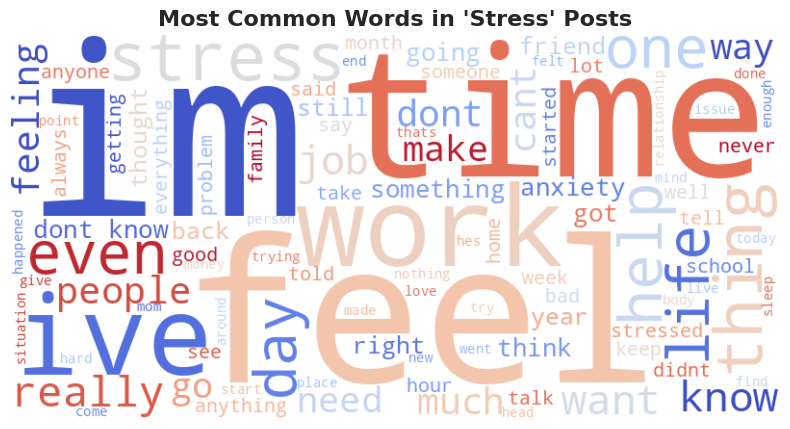

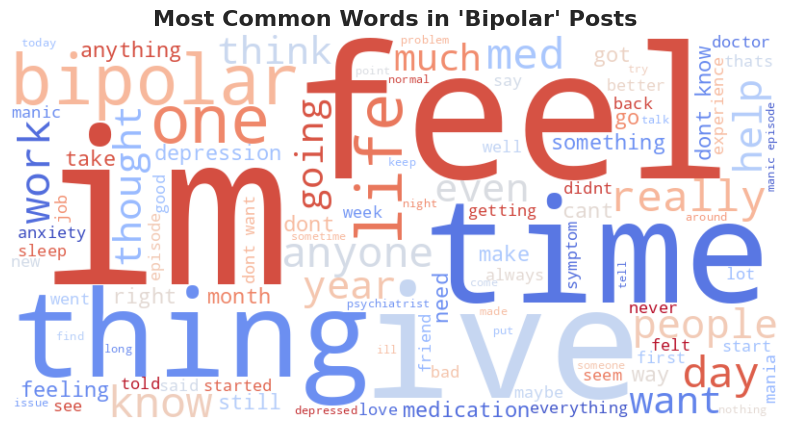

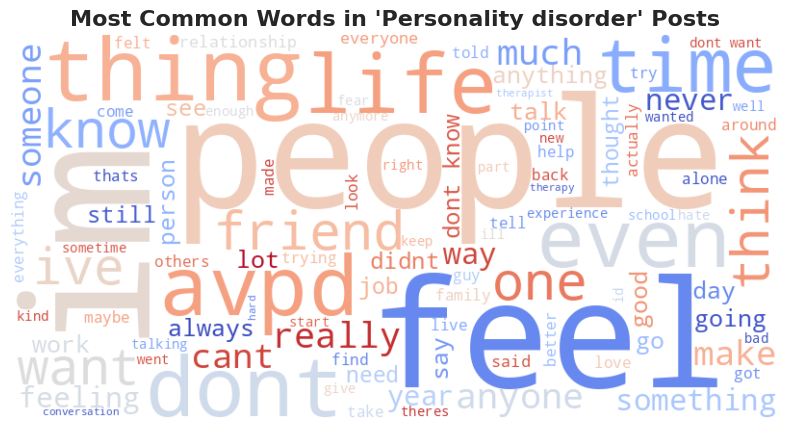

In [ ]:
# Bhavesh
# Set a consistent style
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a function to generate and display word clouds
def generate_wordcloud(text, title, colormap='viridis'):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,
        max_words=100
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.show()

# Loop through each unique status and generate a word cloud
for status in mental_health['status'].unique():
    # Join all clean statements for this condition
    text = ' '.join(mental_health[mental_health['status'] == status]['clean_statement'])

    # Generate the word cloud
    generate_wordcloud(text, f"Most Common Words in '{status}' Posts", colormap='coolwarm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top meaningful words: ['like', 'feel', 'want', 'know', 'life', 'get', 'im', 'even', 'time', 'would', 'people', 'really', 'cannot', 'one', 'going', 'think', 'go', 'much', 'never', 'day']


<ipython-input-42-5877b5d6b310>:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df = heatmap_df.fillna(0).astype(int)


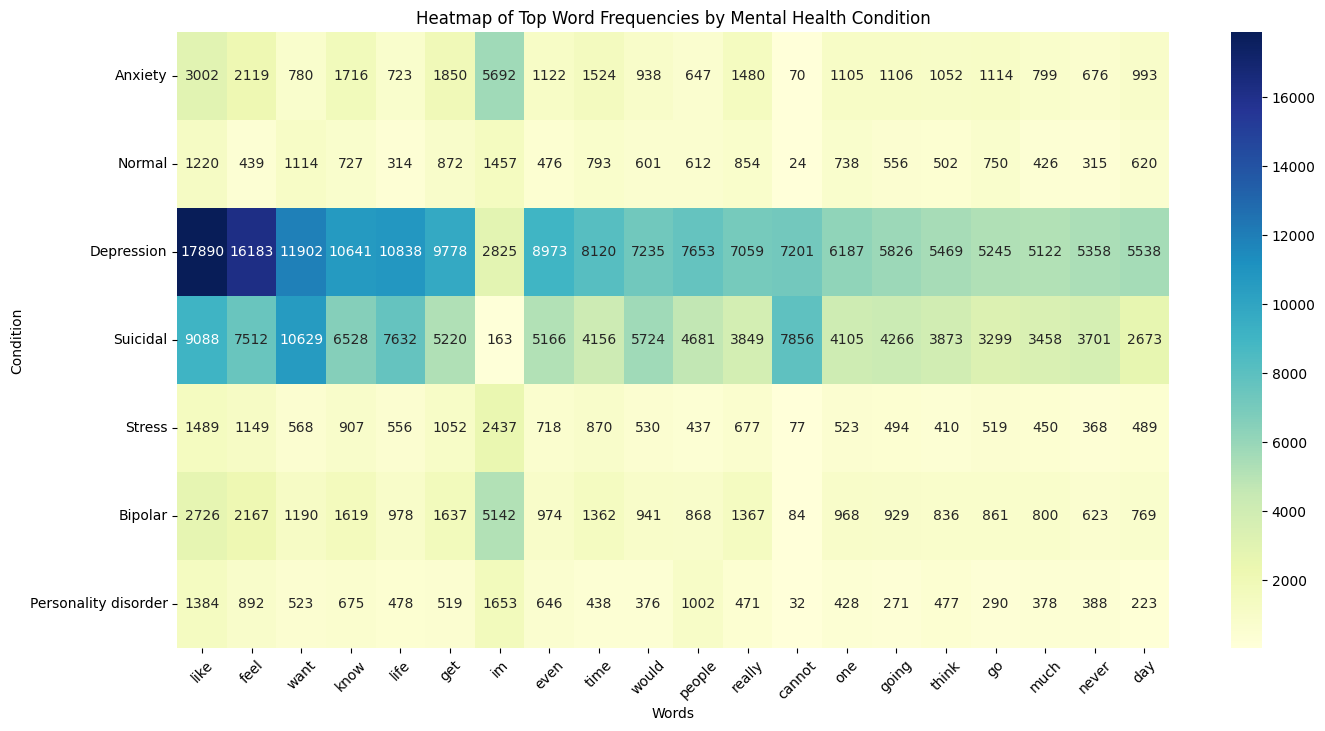

In [ ]:
# / / / / / / / / / / /
# OMMITTED FROM REPORT
# / / / / / / / / / / /

# Bhavesh
# Download and load NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english'))

def preprocess(text):
    """Lowercase, remove non-alpha chars, strip stopwords."""
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        words = text.strip().split()
        meaningful_words = [word for word in words if word not in nltk_stopwords]
        return ' '.join(meaningful_words)
    return ""

# Apply preprocessing to all statements
mental_health['clean_statement'] = mental_health['statement'].apply(preprocess)

# Get top 20 most frequent words from cleaned statements
all_text = " ".join(mental_health['clean_statement'])
word_counts = Counter(all_text.split())
top_words = [word for word, freq in word_counts.most_common(20)]

print("Top meaningful words:", top_words)

# Build dataframe for word frequencies by condition
heatmap_df = pd.DataFrame(index=mental_health['status'].unique(), columns=top_words)

for condition in mental_health['status'].unique():
    condition_text = " ".join(mental_health[mental_health['status'] == condition]['clean_statement'])
    condition_counts = Counter(condition_text.split())

    for word in top_words:
        heatmap_df.loc[condition, word] = condition_counts.get(word, 0)

heatmap_df = heatmap_df.fillna(0).astype(int)

# Plot heatmap of word frequencies by condition
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Top Word Frequencies by Mental Health Condition')
plt.xlabel('Words')
plt.ylabel('Condition')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Noticed: depression and suicidal terms stand out;
# anxiety and bipolar conditions show similar word patterns.


## suicidal-tweet-detection-dataset

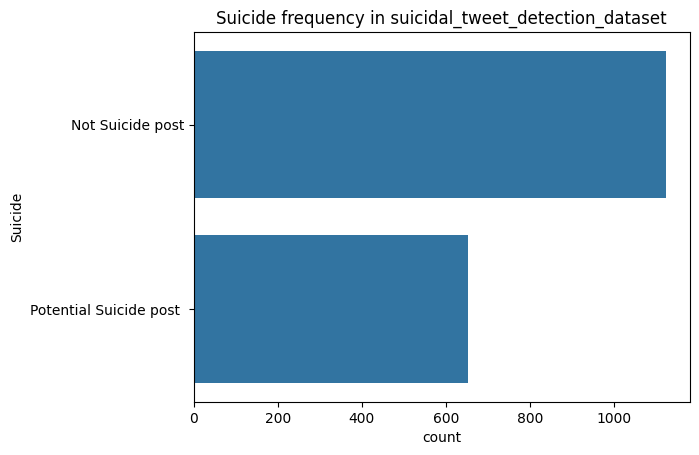

In [ ]:
# Set title
plt.title("Suicide frequency in suicidal_tweet_detection_dataset")

# Plot a frequency plot of the status associated to the tweet
sns.countplot(data=suicidal_tweet_detection_dataset,
              y='Suicide',
              order=suicidal_tweet_detection_dataset['Suicide'].value_counts().index
            )

plt.show()

In [ ]:
# Get counts of each class
suicide_counts = suicidal_tweet_detection_dataset['Suicide'].value_counts()

# Convert to a DataFrame for better readability
suicide_counts_df = suicide_counts.reset_index()
suicide_counts_df.columns = ['Suicide Status', 'Count']

# Display the table
print(suicide_counts_df)


           Suicide Status  Count
0        Not Suicide post   1124
1  Potential Suicide post    653


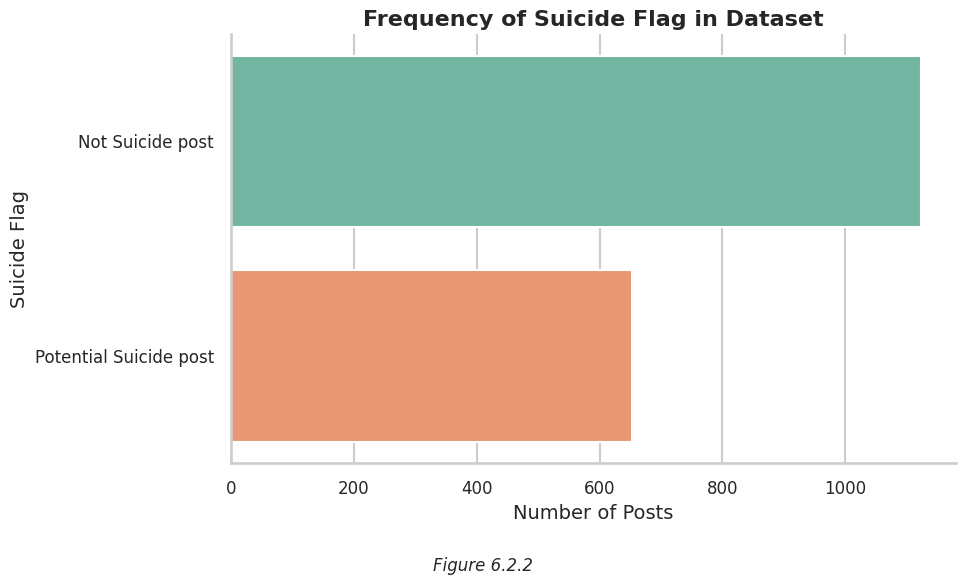

In [ ]:
# Bhavesh

sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(10, 6))

# Define the unique number of statuses
unique_statuses = suicidal_tweet_detection_dataset['Suicide'].nunique()

# Use a consistent, colorblind-friendly palette for better accessibility
palette = sns.color_palette("Set2", n_colors=unique_statuses)

# Plot the distribution of mental health conditions by post count
sns.countplot(
    data=suicidal_tweet_detection_dataset,
    y='Suicide',
    hue='Suicide',
    order=suicidal_tweet_detection_dataset['Suicide'].value_counts().index,
    palette=palette,
    legend=False,
    ax=ax  # Pass the axis to sns.countplot
)

# Add a descriptive title and axis labels for clarity
ax.set_title("Frequency of Suicide Flag in Dataset", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Posts", fontsize=14)
ax.set_ylabel("Suicide Flag", fontsize=14)

# Adjust tick label sizes to improve readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines for a cleaner look
sns.despine(ax=ax)

# Adjust layout and make space at the bottom for the caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure number and caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.2.2',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()


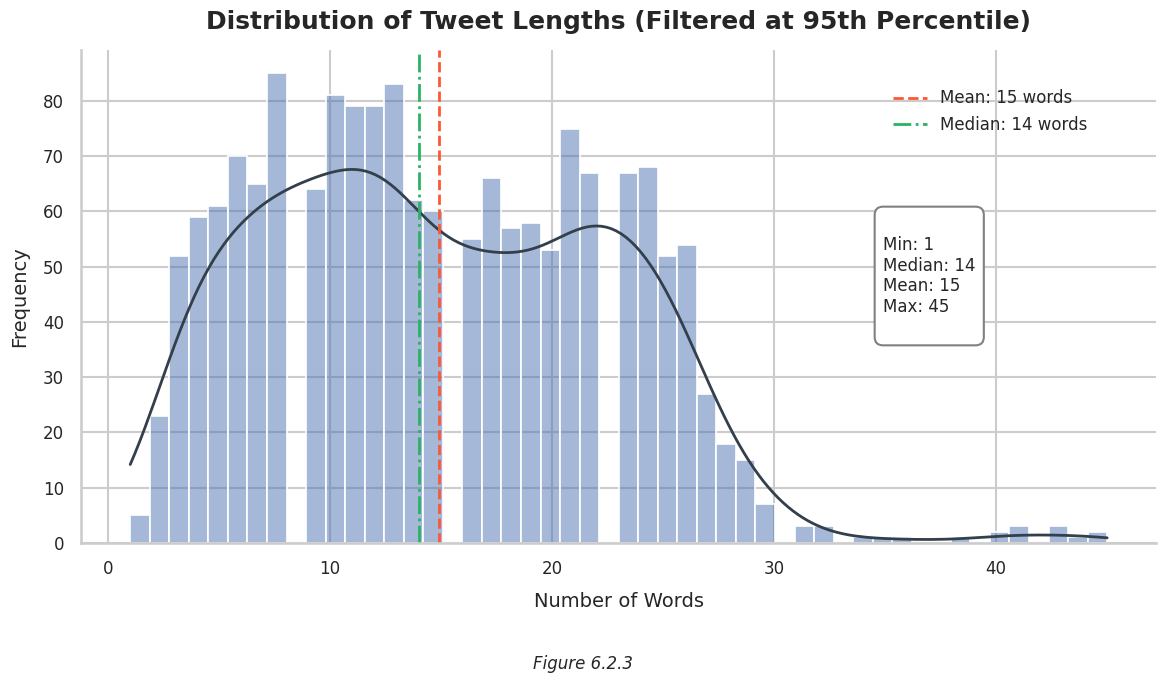

In [ ]:
# Bhavesh

# Calculate text length (if not already present)
suicidal_tweet_detection_dataset['text_length'] = suicidal_tweet_detection_dataset['Tweet'].apply(lambda x: len(str(x).split()))

# Calculate 95th percentile threshold
percentile_95 = suicidal_tweet_detection_dataset['text_length'].quantile(0.95)

# Filter data below the 95th percentile to reduce skew from outliers
filtered_data = suicidal_tweet_detection_dataset[suicidal_tweet_detection_dataset['text_length'] <= percentile_95]

# Calculate summary statistics on filtered data
mean_length = filtered_data['text_length'].mean()
median_length = filtered_data['text_length'].median()
max_length = filtered_data['text_length'].max()
min_length = filtered_data['text_length'].min()

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(12, 7))

# Plot histogram on filtered data
sns.histplot(
    data=filtered_data,
    x='text_length',
    bins=50,
    kde=True,
    color='#4C72B0',
    edgecolor='white',
    ax=ax
)

# Style the KDE line for better visibility
plt.setp(ax.lines, linewidth=2, color='#333F4B')

# Add mean and median vertical lines
ax.axvline(mean_length, color='#FF5733', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.0f} words')
ax.axvline(median_length, color='#28B463', linestyle='-.', linewidth=2, label=f'Median: {median_length:.0f} words')

# Add title and axis labels
ax.set_title('Distribution of Tweet Lengths (Filtered at 95th Percentile)', fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel('Number of Words', fontsize=14, labelpad=10)
ax.set_ylabel('Frequency', fontsize=14, labelpad=10)

# Configure legend
ax.legend(frameon=False, fontsize=12, loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Adjust tick label sizes for readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner appearance
sns.despine(ax=ax)

# Add summary stats box inside the figure
fig.text(
    0.75, 0.5,
    f'''
Min: {min_length:.0f}
Median: {median_length:.0f}
Mean: {mean_length:.0f}
Max: {max_length:.0f}
''',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Adjust layout and leave space at the bottom for a caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.2.3',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()


Bhavesh

Thoughts following the above plot:

* Consider truncating tweets to a maximum length of 50 tokens or words
* OR filter out tweets with >=100 tokens/words if they don't add value
* Model implications: BERT, DistilBERT is good for short to medium length texts and will also work with sentence-level classification tasks. CNNs would work in this case due to the short texts combined with n-grams.
* Sampling -> need to consider how we sample the data due to the inbalance between suicidial and non-suicidal tweets


In [ ]:
!pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.4 MB/s eta 0:00:00


Top Bigrams in Suicidal Tweets:
[('i am', 259), ('want to', 197), ('do not', 151), ('i do', 124), ('i have', 112), ('and i', 100), ('to be', 99), ('tired of', 92), ('i want', 84), ('i just', 81), ('i hate', 77), ('can not', 72), ('my life', 67), ('to die', 67), ('not want', 64), ('i can', 59), ('hate myself', 52), ('going to', 45), ('kill myself', 45), ('but i', 45)]

Top Bigrams in Non-Suicidal Tweets:
[('i am', 116), ('it is', 68), ('want to', 43), ('going to', 41), ('you are', 40), ('i have', 37), ('do not', 36), ('in the', 33), ('i will', 32), ('to be', 32), ('i want', 31), ('that is', 30), ('for the', 29), ('to the', 29), ('have a', 28), ('i love', 28), ('can not', 25), ('of the', 23), ('i do', 20), ('is the', 20)]


<ipython-input-89-6a744414da20>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suicidal_bigram_freqs, y=suicidal_bigram_words, palette='Reds_r', ax=ax)


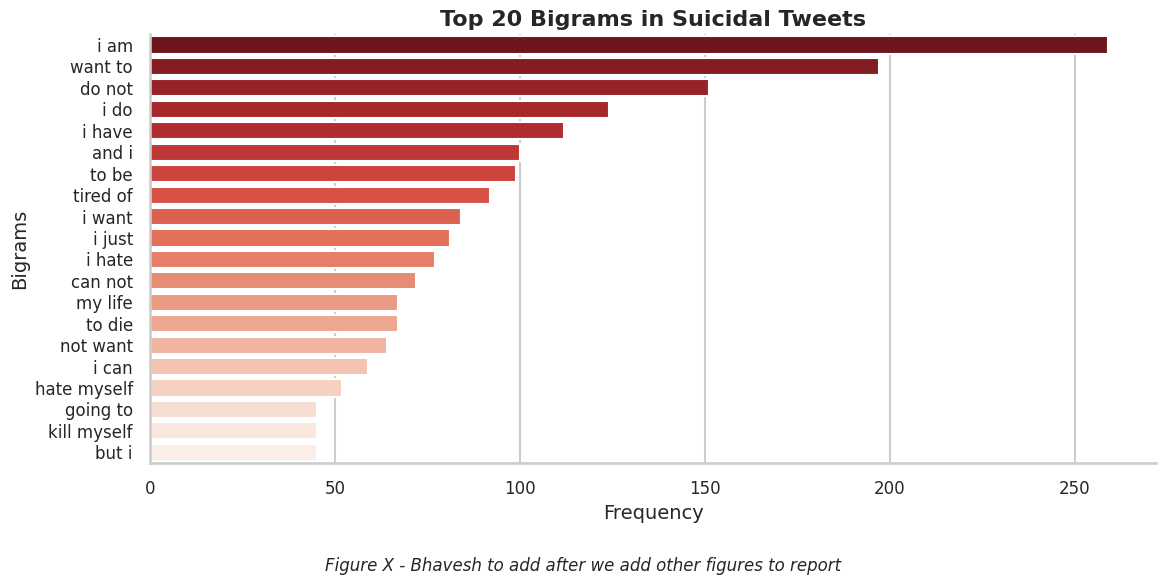

<ipython-input-89-6a744414da20>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_suicidal_bigram_freqs, y=non_suicidal_bigram_words, palette='Blues_r', ax=ax)


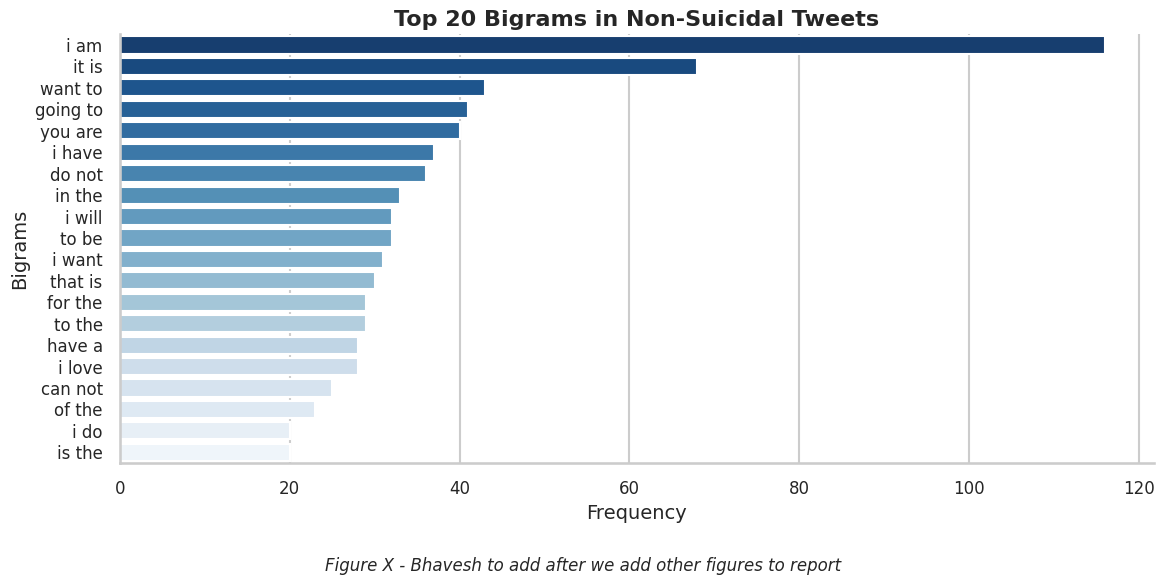

In [ ]:
# Bhavesh

# Load spaCy English tokenizer
nlp = spacy.load('en_core_web_sm')
# TODO: Consider multi-language support?

def clean_tokenize_spacy(text):
    """Expand contractions, lowercase, tokenize, and retain alphabetic tokens (including expanded ones)."""
    if isinstance(text, str):
        expanded_text = contractions.fix(text)
        doc = nlp(expanded_text.lower())
        tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
        return tokens
    return []

def get_top_ngrams(tweets, ngram_range=2, top_n=20):
    """Extract top n-grams from a list of tweets."""
    ngram_list = []

    for tweet in tweets:
        tokens = clean_tokenize_spacy(tweet)
        if len(tokens) >= ngram_range:
            ngrams = zip(*[tokens[i:] for i in range(ngram_range)])
            ngram_list.extend([' '.join(gram) for gram in ngrams])

    ngram_counts = Counter(ngram_list)
    return ngram_counts.most_common(top_n)

# Strip whitespace from 'Suicide' column values
suicidal_tweet_detection_dataset['Suicide'] = suicidal_tweet_detection_dataset['Suicide'].str.strip()

# Filter suicidal and non-suicidal tweets
suicidal_tweets = suicidal_tweet_detection_dataset[
    suicidal_tweet_detection_dataset['Suicide'] == 'Potential Suicide post'
]['Tweet']

non_suicidal_tweets = suicidal_tweet_detection_dataset[
    suicidal_tweet_detection_dataset['Suicide'] == 'Not Suicide post'
]['Tweet']

# Get top bigrams for each class
top_bigrams_suicidal = get_top_ngrams(suicidal_tweets, ngram_range=2, top_n=20)
top_bigrams_non_suicidal = get_top_ngrams(non_suicidal_tweets, ngram_range=2, top_n=20)

print("Top Bigrams in Suicidal Tweets:")
print(top_bigrams_suicidal)

print("\nTop Bigrams in Non-Suicidal Tweets:")
print(top_bigrams_non_suicidal)

# Plot suicidal tweet bigrams
if top_bigrams_suicidal:
    suicidal_bigram_words = [bigram for bigram, freq in top_bigrams_suicidal]
    suicidal_bigram_freqs = [freq for bigram, freq in top_bigrams_suicidal]

    fig, ax = plt.subplots(figsize=(12, 6))  # Use fig and ax for better control
    sns.barplot(x=suicidal_bigram_freqs, y=suicidal_bigram_words, palette='Reds_r', ax=ax)

    ax.set_title('Top 20 Bigrams in Suicidal Tweets', fontsize=16, fontweight='bold')
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('Bigrams', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    sns.despine(ax=ax)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Add figure caption below the plot
    fig.text(
        0.5, 0.02,
        'Figure X - Bhavesh to add after we add other figures to report',
        ha='center',
        fontsize=12,
        fontstyle='italic'
    )

    plt.show()
else:
    print("No bigrams found in suicidal tweets.")

# Plot non-suicidal tweet bigrams
if top_bigrams_non_suicidal:
    non_suicidal_bigram_words = [bigram for bigram, freq in top_bigrams_non_suicidal]
    non_suicidal_bigram_freqs = [freq for bigram, freq in top_bigrams_non_suicidal]

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=non_suicidal_bigram_freqs, y=non_suicidal_bigram_words, palette='Blues_r', ax=ax)

    ax.set_title('Top 20 Bigrams in Non-Suicidal Tweets', fontsize=16, fontweight='bold')
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('Bigrams', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    sns.despine(ax=ax)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Add figure caption below the plot
    fig.text(
        0.5, 0.02,
        'Figure X - Bhavesh to add after we add other figures to report',
        ha='center',
        fontsize=12,
        fontstyle='italic'
    )

    plt.show()
else:
    print("No bigrams found in non-suicidal tweets.")


Bhavesh

Thoughts following the above plot:

* Bigrams/trigrams might be informative features to use in the model given how different they are across labels
* Context is important as bigrams won't pick up on them
* Indicates the need to look at sentiment polarity


## reddit_mental_health_data

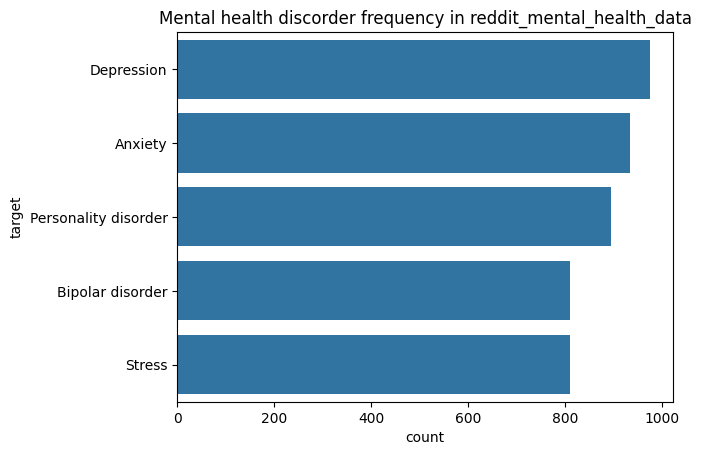

In [ ]:
# Set title
plt.title("Mental health discorder frequency in reddit_mental_health_data")

# Plot a frequency plot of the status associated to the tweet
sns.countplot(data=reddit_mental_health_data,
              y='target',
              order=reddit_mental_health_data['target'].value_counts().index
            )

plt.show()

<ipython-input-101-8695cc81205d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


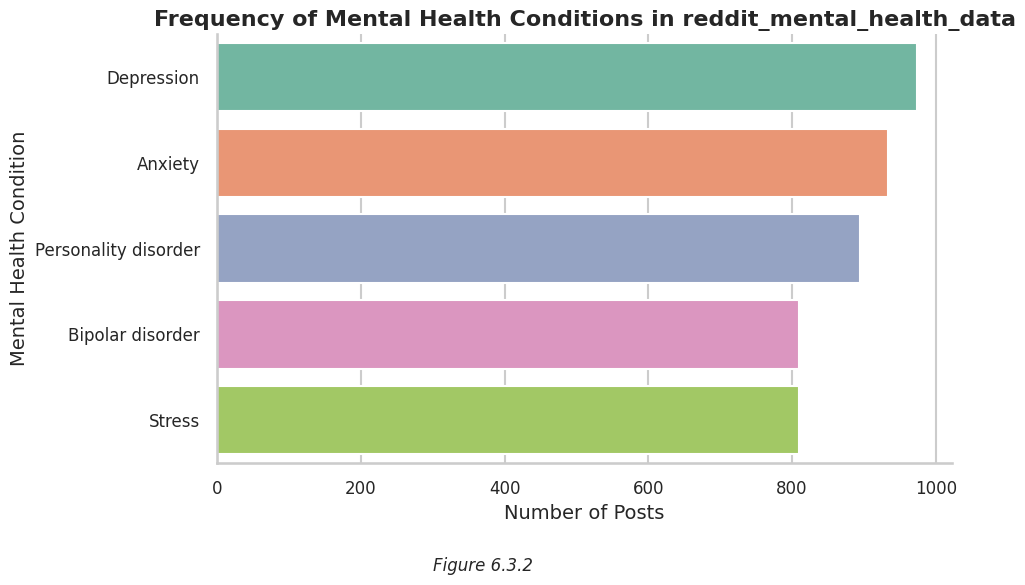

In [ ]:
# Bhavesh

sns.set_style("whitegrid")
sns.set_context("talk")

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(10, 6))

# Define the unique number of targets (mental health conditions)
unique_targets = reddit_mental_health_data['target'].nunique()

# Use a consistent, colorblind-friendly palette for better accessibility
palette = sns.color_palette("Set2", n_colors=unique_targets)

# Plot the distribution of mental health conditions by post count
sns.countplot(
    data=reddit_mental_health_data,
    y='target',
    order=reddit_mental_health_data['target'].value_counts().index,
    palette=palette,
    ax=ax,
    legend=False
)

# Add a descriptive title and axis labels for clarity
ax.set_title("Frequency of Mental Health Conditions in reddit_mental_health_data", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Posts", fontsize=14)
ax.set_ylabel("Mental Health Condition", fontsize=14)

# Adjust tick label sizes to improve readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines for a cleaner look
sns.despine(ax=ax)

# Adjust layout and make space at the bottom for the caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure number and caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.3.2',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()


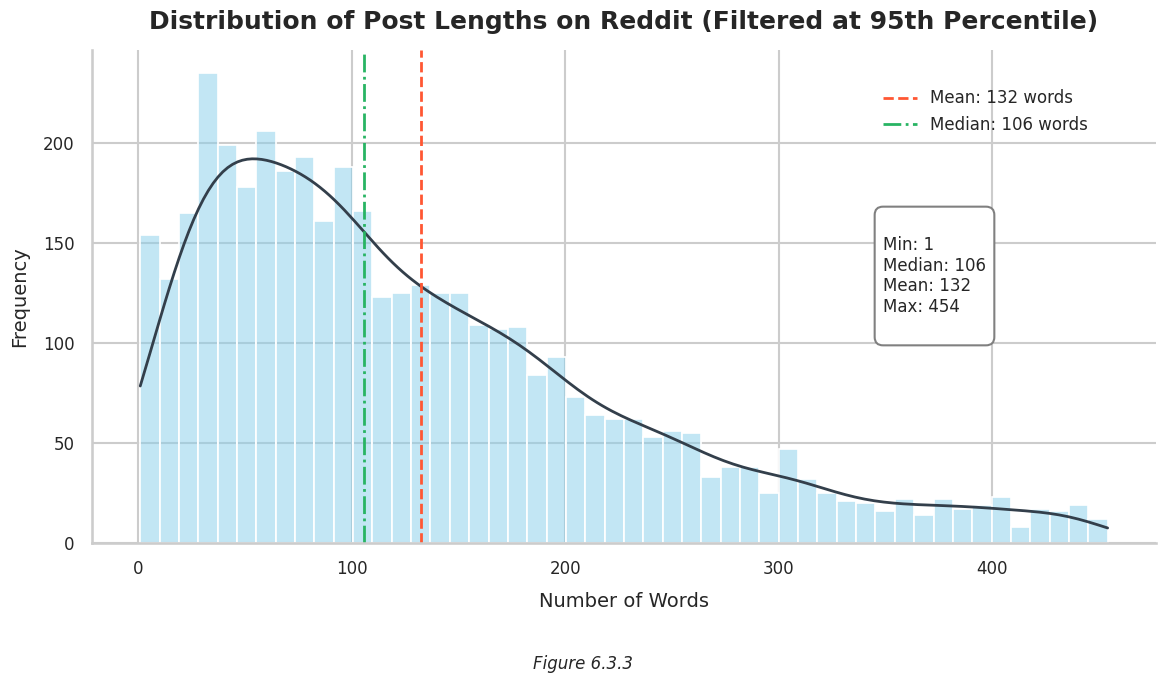

In [ ]:
# Bhavesh

# Calculate text length (if not already present)
reddit_mental_health_data['text_length'] = reddit_mental_health_data['text'].apply(lambda x: len(str(x).split()))

# Calculate 95th percentile threshold to reduce skew from long outliers
percentile_95 = reddit_mental_health_data['text_length'].quantile(0.95)

# Filter data below the 95th percentile
filtered_data = reddit_mental_health_data[reddit_mental_health_data['text_length'] <= percentile_95]

# Calculate summary statistics on filtered data
mean_length = filtered_data['text_length'].mean()
median_length = filtered_data['text_length'].median()
max_length = filtered_data['text_length'].max()
min_length = filtered_data['text_length'].min()

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(12, 7))

# Plot histogram on filtered data
sns.histplot(
    data=filtered_data,
    x='text_length',
    bins=50,
    kde=True,
    color='skyblue',
    edgecolor='white',
    ax=ax
)

# Style the KDE line for better visibility
plt.setp(ax.lines, linewidth=2, color='#333F4B')

# Add mean and median vertical lines
ax.axvline(mean_length, color='#FF5733', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.0f} words')
ax.axvline(median_length, color='#28B463', linestyle='-.', linewidth=2, label=f'Median: {median_length:.0f} words')

# Add title and axis labels
ax.set_title('Distribution of Post Lengths on Reddit (Filtered at 95th Percentile)', fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel('Number of Words', fontsize=14, labelpad=10)
ax.set_ylabel('Frequency', fontsize=14, labelpad=10)

# Configure legend
ax.legend(frameon=False, fontsize=12, loc='upper right', bbox_to_anchor=(0.95, 0.95))

# Adjust tick label sizes for readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner appearance
sns.despine(ax=ax)

# Add summary stats box inside the figure
fig.text(
    0.75, 0.5,
    f'''
Min: {min_length:.0f}
Median: {median_length:.0f}
Mean: {mean_length:.0f}
Max: {max_length:.0f}
''',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Adjust layout and leave space at the bottom for a caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.3.3',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()



Top Bigrams for Depression Posts (Filtered):

mental health: 49
year old: 44
high school: 41
long time: 39
depression anxiety: 37
good friend: 30
panic attack: 30
day day: 29
friend family: 27
thing well: 27


<ipython-input-95-d7a7ee4a83d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)


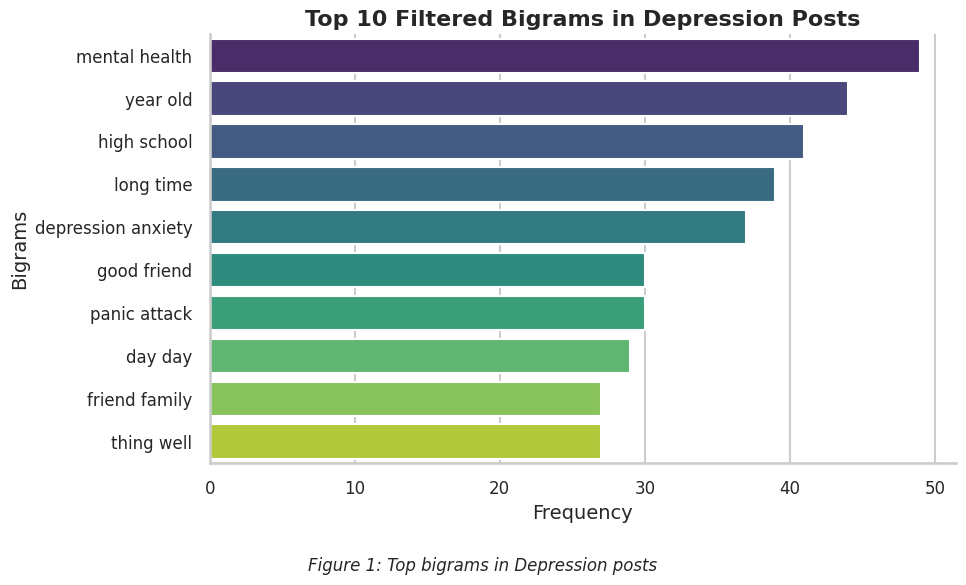


Top Bigrams for Stress Posts (Filtered):

stress anxiety: 52
year old: 43
mental health: 34
stress stress: 33
stress management: 31
panic attack: 29
way stress: 28
anxiety stress: 27
day day: 26
stress level: 25


<ipython-input-95-d7a7ee4a83d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)


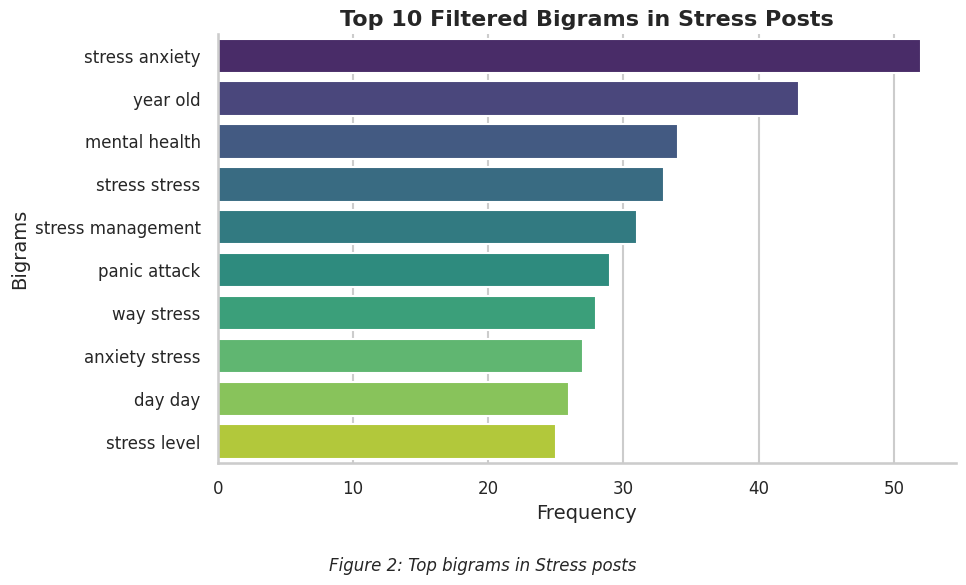


Top Bigrams for Bipolar disorder Posts (Filtered):

manic episode: 101
depressive episode: 69
mental health: 64
bipolar disorder: 59
year old: 36
mental illness: 33
mixed episode: 28
people bipolar: 25
hypomanic episode: 23
panic attack: 22


<ipython-input-95-d7a7ee4a83d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)


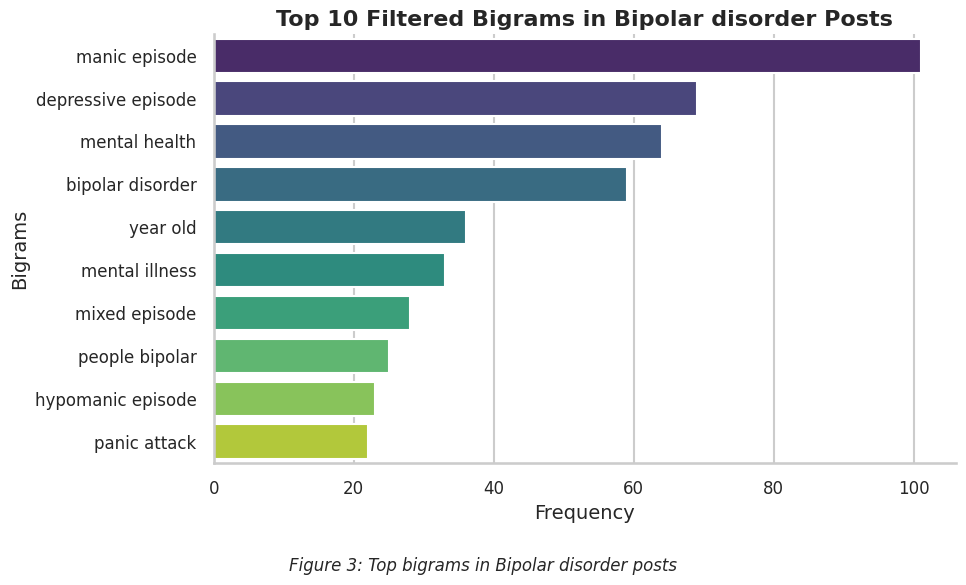


Top Bigrams for Personality disorder Posts (Filtered):

social anxiety: 71
mental health: 55
year old: 48
people people: 38
personality disorder: 34
social medium: 33
friend friend: 31
good friend: 30
social interaction: 30
high school: 27


<ipython-input-95-d7a7ee4a83d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)


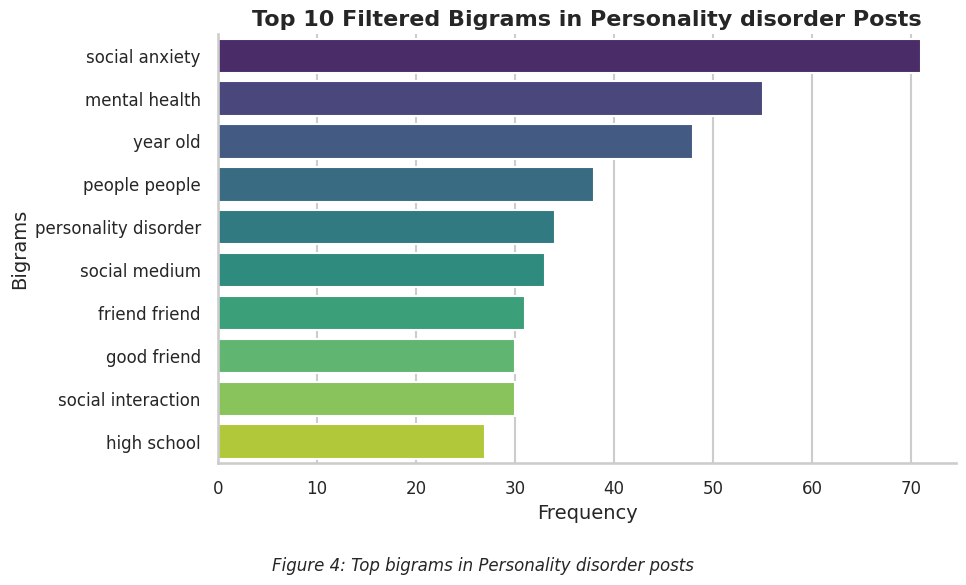


Top Bigrams for Anxiety Posts (Filtered):

panic attack: 180
health anxiety: 68
anxiety bad: 59
anxiety attack: 46
mental health: 42
bad anxiety: 42
heart rate: 42
anxiety depression: 39
physical symptom: 38
chest pain: 38


<ipython-input-95-d7a7ee4a83d8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)


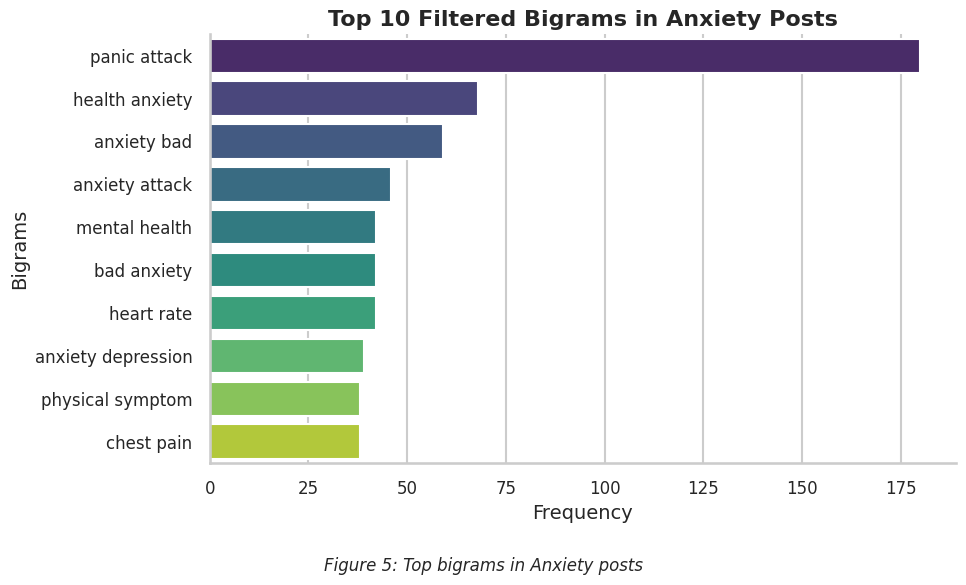

In [ ]:
# Bhavesh

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

def clean_tokenize_filtered(text):
    """
    Tokenize text, lemmatize, remove stopwords,
    and keep only NOUN and ADJ tokens.
    """
    if isinstance(text, str):
        doc = nlp(text.lower())
        allowed_pos = ['NOUN', 'ADJ']
        tokens = [
            token.lemma_
            for token in doc
            if token.is_alpha and not token.is_stop and token.pos_ in allowed_pos
        ]
        return tokens
    return []

def get_top_ngrams(texts, ngram_range=2, top_n=20):
    """
    Extract top n-grams from a list of texts after filtering.
    """
    ngram_list = []

    for text in texts:
        tokens = clean_tokenize_filtered(text)
        if len(tokens) >= ngram_range:
            ngrams = zip(*[tokens[i:] for i in range(ngram_range)])
            ngram_list.extend([' '.join(gram) for gram in ngrams])

    ngram_counts = Counter(ngram_list)
    return ngram_counts.most_common(top_n)

# Iterate through each mental health condition in the dataset
unique_conditions = reddit_mental_health_data['target'].unique()

# Start figure numbering (optional)
figure_num = 1

for condition in unique_conditions:
    print(f"\nTop Bigrams for {condition} Posts (Filtered):\n")

    # Combine 'text' and 'title' fields for analysis
    condition_texts = (
        reddit_mental_health_data[reddit_mental_health_data['target'] == condition]['text'] + ' ' +
        reddit_mental_health_data[reddit_mental_health_data['target'] == condition]['title']
    )

    # Get top bigrams for the condition
    top_bigrams = get_top_ngrams(condition_texts, ngram_range=2, top_n=10)

    # Print bigrams and their frequencies
    for bigram, freq in top_bigrams:
        print(f"{bigram}: {freq}")

    # Plot top bigrams if any are found
    if top_bigrams:
        bigram_phrases = [bigram for bigram, freq in top_bigrams]
        bigram_freqs = [freq for bigram, freq in top_bigrams]

        # Create figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))

        # Barplot for bigrams
        sns.barplot(x=bigram_freqs, y=bigram_phrases, palette='viridis', ax=ax)

        # Titles and labels
        ax.set_title(f'Top 10 Filtered Bigrams in {condition} Posts', fontsize=16, fontweight='bold')
        ax.set_xlabel('Frequency', fontsize=14)
        ax.set_ylabel('Bigrams', fontsize=14)

        # Adjust tick label sizes
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

        sns.despine(ax=ax)

        # Adjust layout and reserve space for caption
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.2)

        # Add figure caption below the plot
        fig.text(
            0.5, 0.02,  # Centered at the bottom
            f'Figure {figure_num}: Top bigrams in {condition} posts',
            ha='center',
            fontsize=12,
            fontstyle='italic'
        )

        plt.show()

        # Increment figure number for next plot
        figure_num += 1

    else:
        print(f"No meaningful bigrams found for {condition} posts.")

# TODO: Explore other POS tags or model variations for better granularity


## Dreaddit

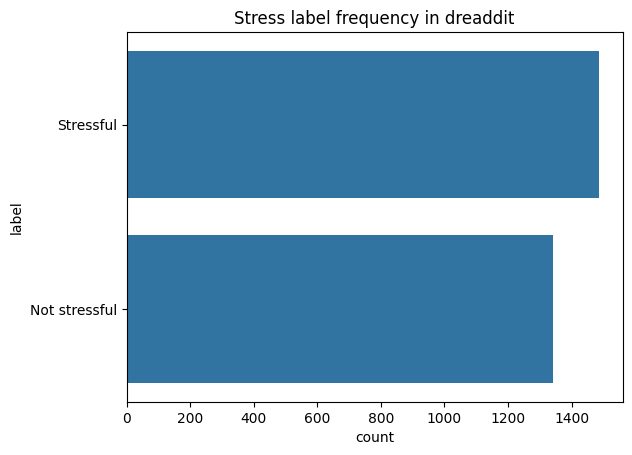

In [ ]:
# Set title
plt.title("Stress label frequency in dreaddit")

# Plot a frequency plot of the status associated to the tweet
sns.countplot(data=dreaddit,
              y='label',
              order=dreaddit['label'].value_counts().index
            )

plt.show()

<ipython-input-103-fd9c3de9d981>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


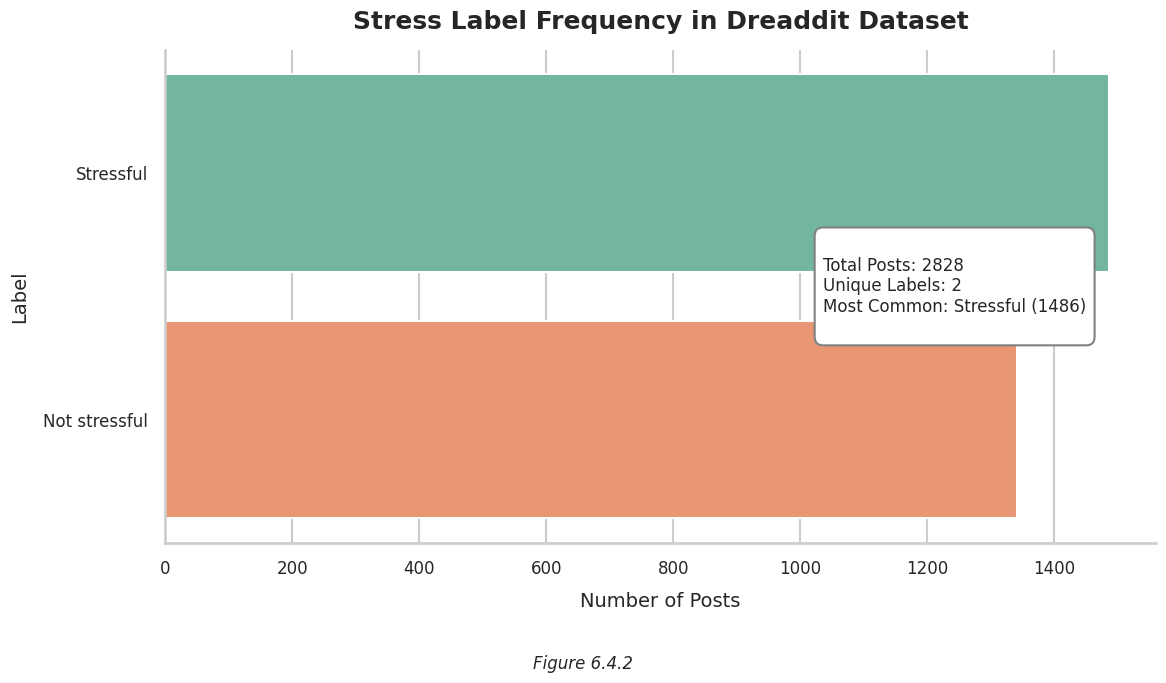

In [ ]:
# Bhavesh

# Calculate label counts for summary stats
label_counts = dreaddit['label'].value_counts()

# Basic statistics
total_labels = len(dreaddit)
num_classes = dreaddit['label'].nunique()
most_common_label = label_counts.idxmax()
most_common_count = label_counts.max()

# Create figure and axis for better layout control
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the frequency of labels
sns.countplot(
    data=dreaddit,
    y='label',
    order=label_counts.index,
    palette='Set2',
    ax=ax
)

# Add title and axis labels
ax.set_title('Stress Label Frequency in Dreaddit Dataset', fontsize=18, fontweight='bold', pad=15)
ax.set_xlabel('Number of Posts', fontsize=14, labelpad=10)
ax.set_ylabel('Label', fontsize=14, labelpad=10)

# Adjust tick label sizes for readability
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines for a cleaner appearance
sns.despine(ax=ax)

# Add summary stats box inside the figure
fig.text(
    0.7, 0.5,
    f'''
Total Posts: {total_labels}
Unique Labels: {num_classes}
Most Common: {most_common_label} ({most_common_count})
''',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

# Adjust layout and leave space at the bottom for a caption
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add figure caption below the plot
fig.text(
    0.5, 0.02,
    'Figure 6.4.2',
    fontsize=12,
    fontstyle='italic',
    ha='center'
)

# Display the plot
plt.show()


<ipython-input-51-235fb5fd0aa6>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_stress.values, y=subreddit_stress.index, palette='coolwarm')


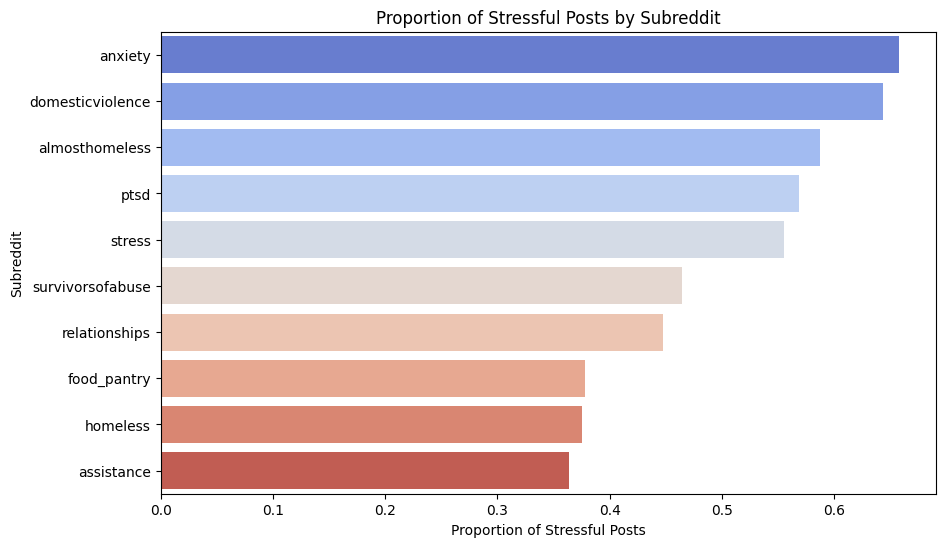

In [ ]:
#Bhavesh
# Map categorical stress label to numeric (0 = Not stressful, 1 = Stressful)
dreaddit['label_num'] = dreaddit['label'].map({'Not stressful': 0, 'Stressful': 1})

# Calculate proportion of stressful posts per subreddit
subreddit_stress = (
    dreaddit.groupby('subreddit')['label_num']
    .mean()
    .sort_values(ascending=False)
)

# Plot proportion of stressful posts by subreddit
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_stress.values, y=subreddit_stress.index, palette='coolwarm')
plt.title('Proportion of Stressful Posts by Subreddit')
plt.xlabel('Proportion of Stressful Posts')
plt.ylabel('Subreddit')
plt.show()

<ipython-input-52-8cdfd3a2eee6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=dreaddit, palette='Set2')


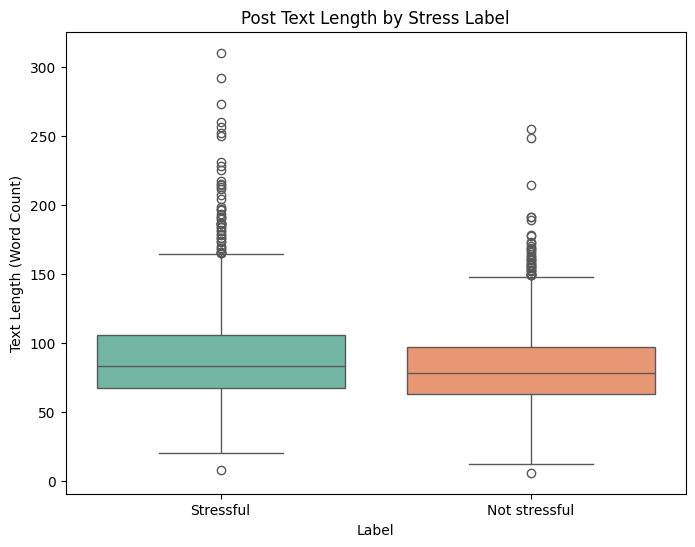

In [ ]:
#Bhavesh
# Add text length feature (word count)
dreaddit['text_length'] = dreaddit['text'].apply(lambda x: len(str(x).split()))

# Plot post text length by stress label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=dreaddit, palette='Set2')
plt.title('Post Text Length by Stress Label')
plt.xlabel('Label')
plt.ylabel('Text Length (Word Count)')
plt.show()

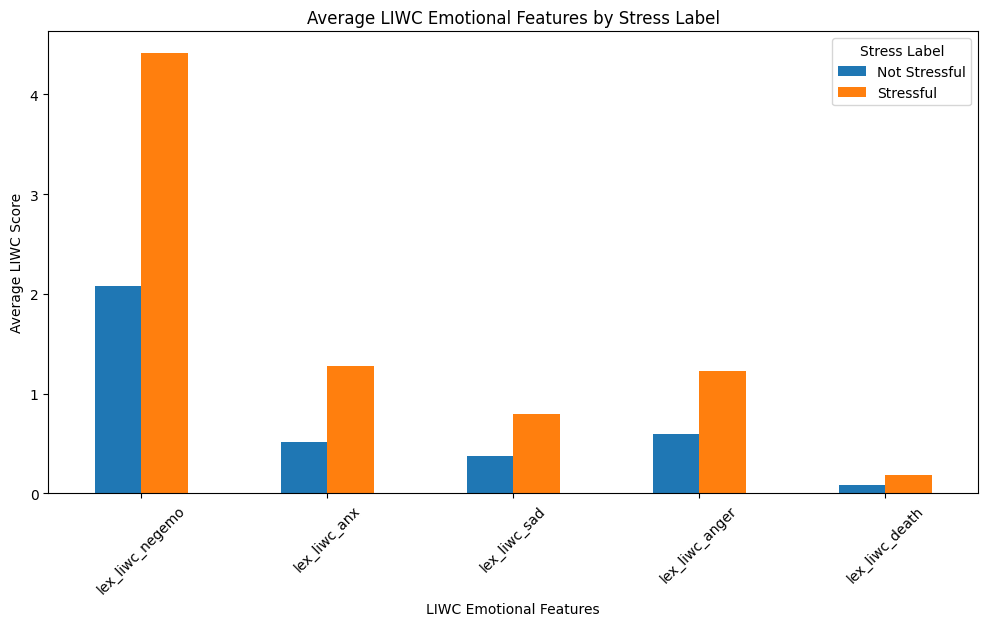

In [ ]:
#Bhavesh
# Compare LIWC emotional features across stress labels
liwc_emotion_cols = [
    'lex_liwc_negemo', 'lex_liwc_anx', 'lex_liwc_sad',
    'lex_liwc_anger', 'lex_liwc_death'
]

(
    dreaddit[liwc_emotion_cols + ['label_num']]
    .groupby('label_num')
    .mean()
    .T
    .plot(kind='bar', figsize=(12, 6))
)
plt.title('Average LIWC Emotional Features by Stress Label')
plt.ylabel('Average LIWC Score')
plt.xlabel('LIWC Emotional Features')
plt.legend(title='Stress Label', labels=['Not Stressful', 'Stressful'])
plt.xticks(rotation=45)
plt.show()

# Notes for group:
# LIWC = Linguistic Inquiry and Word Count
# It analyzes text for Emotional tone, Cognitive processing, Social concerns and other psychological dimensions
# lex_liwc_negemo = negative emotions (e.g bad, hurt)
# lex_liwc_anx = anxiety related words
# lex_liwc_sad = sadness related words
# lex_liwc_anger = anger related words
# lex_liwc_death = death realted words


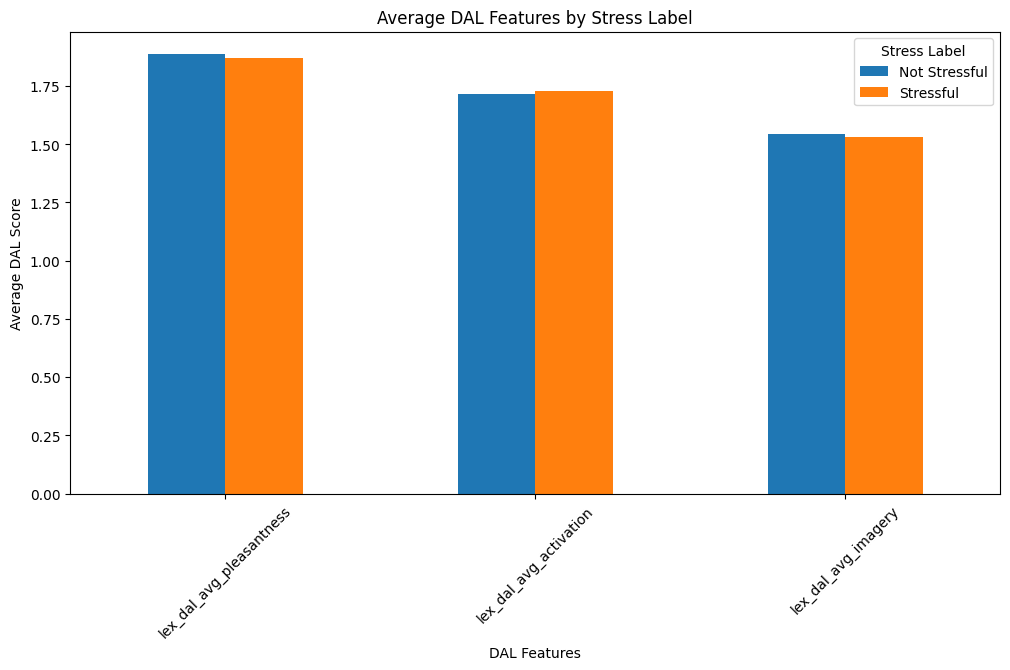

In [ ]:
# Bhavesh
# Compare DAL features across stress labels
dal_cols = [
    'lex_dal_avg_pleasantness',
    'lex_dal_avg_activation',
    'lex_dal_avg_imagery'
]

(
    dreaddit[dal_cols + ['label_num']]
    .groupby('label_num')
    .mean()
    .T
    .plot(kind='bar', figsize=(12, 6))
)
plt.title('Average DAL Features by Stress Label')
plt.ylabel('Average DAL Score')
plt.xlabel('DAL Features')
plt.legend(title='Stress Label', labels=['Not Stressful', 'Stressful'])
plt.xticks(rotation=45)
plt.show()

# Notes for group:
# DAL = Dictionary of Affect in Language
# It's a psycholinguistic tool that scores words across three emotional dimensions (pleaseantness, activation, imagery)
# activation here means how exciting/calming the word is and imagery evokes a mental image
# lex_dal_avg_activation = Average pleasantness of words
# lex_liwc_sad = Average activation/arousal of words
# lex_dal_avg_imagery = aAverage imagery strength

# Not very interesting in this case

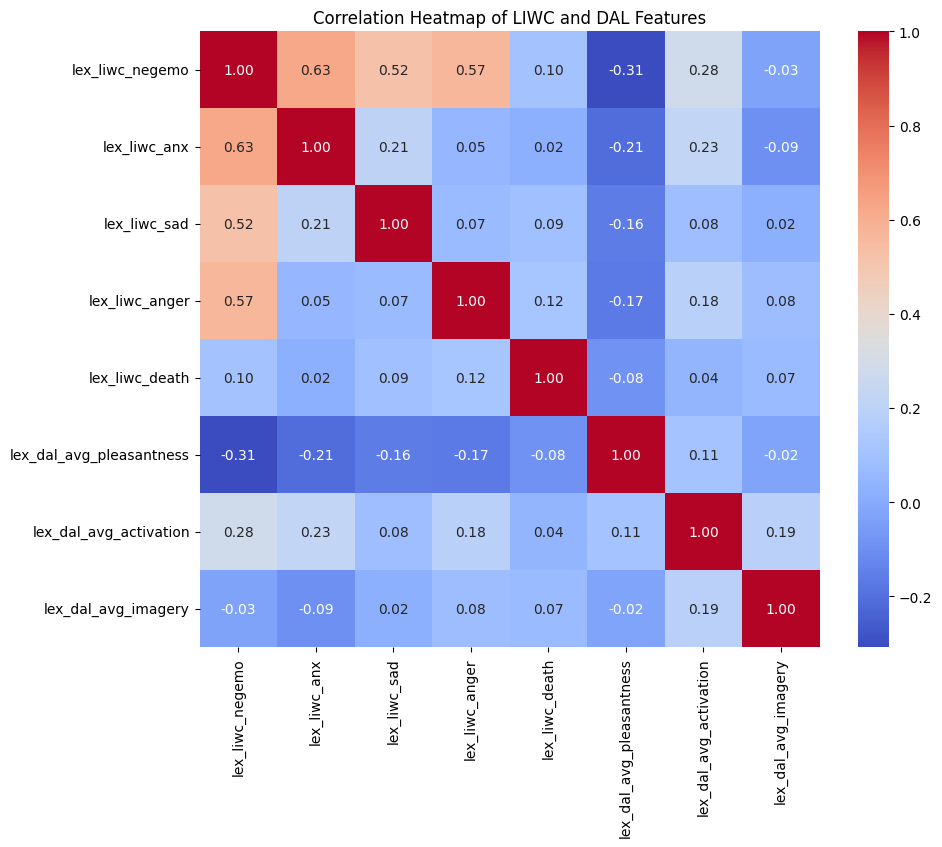

In [ ]:
#Bhavesh
# Correlation matrix for psycholinguistic features (LIWC and DAL)
psycholinguistic_cols = liwc_emotion_cols + dal_cols
correlation_matrix = dreaddit[psycholinguistic_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of LIWC and DAL Features')
plt.show()

# Notes for group:
# The heatmap is to show how strongly and in what direction each LIWC and DAL feature correlates with one another
# LIWC Emotional Features
# lex_liwc_negemo = % of words related to negative emotions
# lex_liwc_anx =	% of words related to anxiety
# lex_liwc_sad	= % of words related to sadness
# lex_liwc_anger = % of words related to anger
# lex_liwc_death = % of words related to death
# DAL Features
# lex_dal_avg_pleasantness - Average pleasantness of words
# lex_dal_avg_activation - Average arousal/energy level
# lex_dal_avg_imagery - Average ease of visualizing the word

# Example of how this can impact model selection - i asked ChatGPT to help me explain:
# "Based on the correlation analysis of psycholinguistic features,
# we observed moderate but manageable correlations among LIWC and DAL features.
# Therefore, we selected models that are robust to feature redundancy and capable of capturing
# complex relationships, including Random Forest and XGBoost. Additionally,
# we tested regularized Logistic Regression to assess performance with interpretable coefficients."

# Model Analysis

In [ ]:
from google.colab import files

dataframes ={
    'mental_health': mental_health,
    'suicidal_tweet_detection_dataset': suicidal_tweet_detection_dataset,
    'reddit_mental_health_data': reddit_mental_health_data,
    'dreaddit': dreaddit
}


for key,value in dataframes.items():
  columns_df = pd.DataFrame(value.columns, columns=['Column_Names'])
  columns_df.to_excel(f'{key}_dataset.xlsx', index=False)
  files.download(f'{key}_dataset.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Possible Model choices
1. Logistic Regression as a good starting point
2. Support Vector Machines (SVM) to add complexity in case of high dimensional data
3. Random Forest / XGBoost / LightGBM

Extra:
- Transformer Models (State-of-the-Art)
  - Gemini *using its API
  - BERT etc through Hugging Face

